<p align="center" style=font-size:50px>Prediction Heart Failure</p>
<p align="center" style=font-size:30px>Exploratory Data Analysis</p>
<p align="center">In this step, will be make a EDA for help understand better the dataset and help a make the modeling later.</p>


### About Dataset

This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.



### Structure of Dataset

- `age`: Age of the patient
- `anaemia`: Decrease of red blood cells or hemoglobin
- `creatinine_phosphokinase`: Level of the CPK enzyme in the blood (mcg/l)
- `diabetes`: If the patient has diabetes
- `ejection_fraction`: Percentage of blood leaving the heart at each contraction
- `high_blood_pressure`: If the patient has hypertension
- `platelets`: Platelets in the blood (kiloplatelets/mL)
- `serum_creatinine`: Level of serum creatinine in the blood (mg/dL)
- `serum_sodium`: Level of serum sodium in the blood (mEq/L)
- `sex`: Woman or man
- `smoking`: If the patient smokes or not
- `time`: Follow-up period (days)
- `death_event`: If the patient died during the follow-up period

In [14]:
#import libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px

In [15]:
# load dataset
df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')

### Understanding Data

In [16]:
print(f'This dataset contains:\n{df.shape[0]} rows and {df.shape[1]} columns.')

This dataset contains:
299 rows and 13 columns.


In [17]:
# First five rows
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [18]:
# columns of dataset
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [19]:
# check null value counts and datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


- This dataset contains only one category feature that is sex, but this feature has already been encoded being 0 woman and 1 man. However, this encoding doesn't make sense, then later in the modeling step it will be change.
- There are no null values

In [20]:
# chance type feature sex
df['sex'] = df['sex'].astype('object')

In [21]:
df_cleaned = df.copy()
df_cleaned['sex'] = np.where(df_cleaned['sex']==0,'woman','man')

In [22]:
df_cleaned.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,man,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,man,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,man,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,man,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,woman,0,8,1


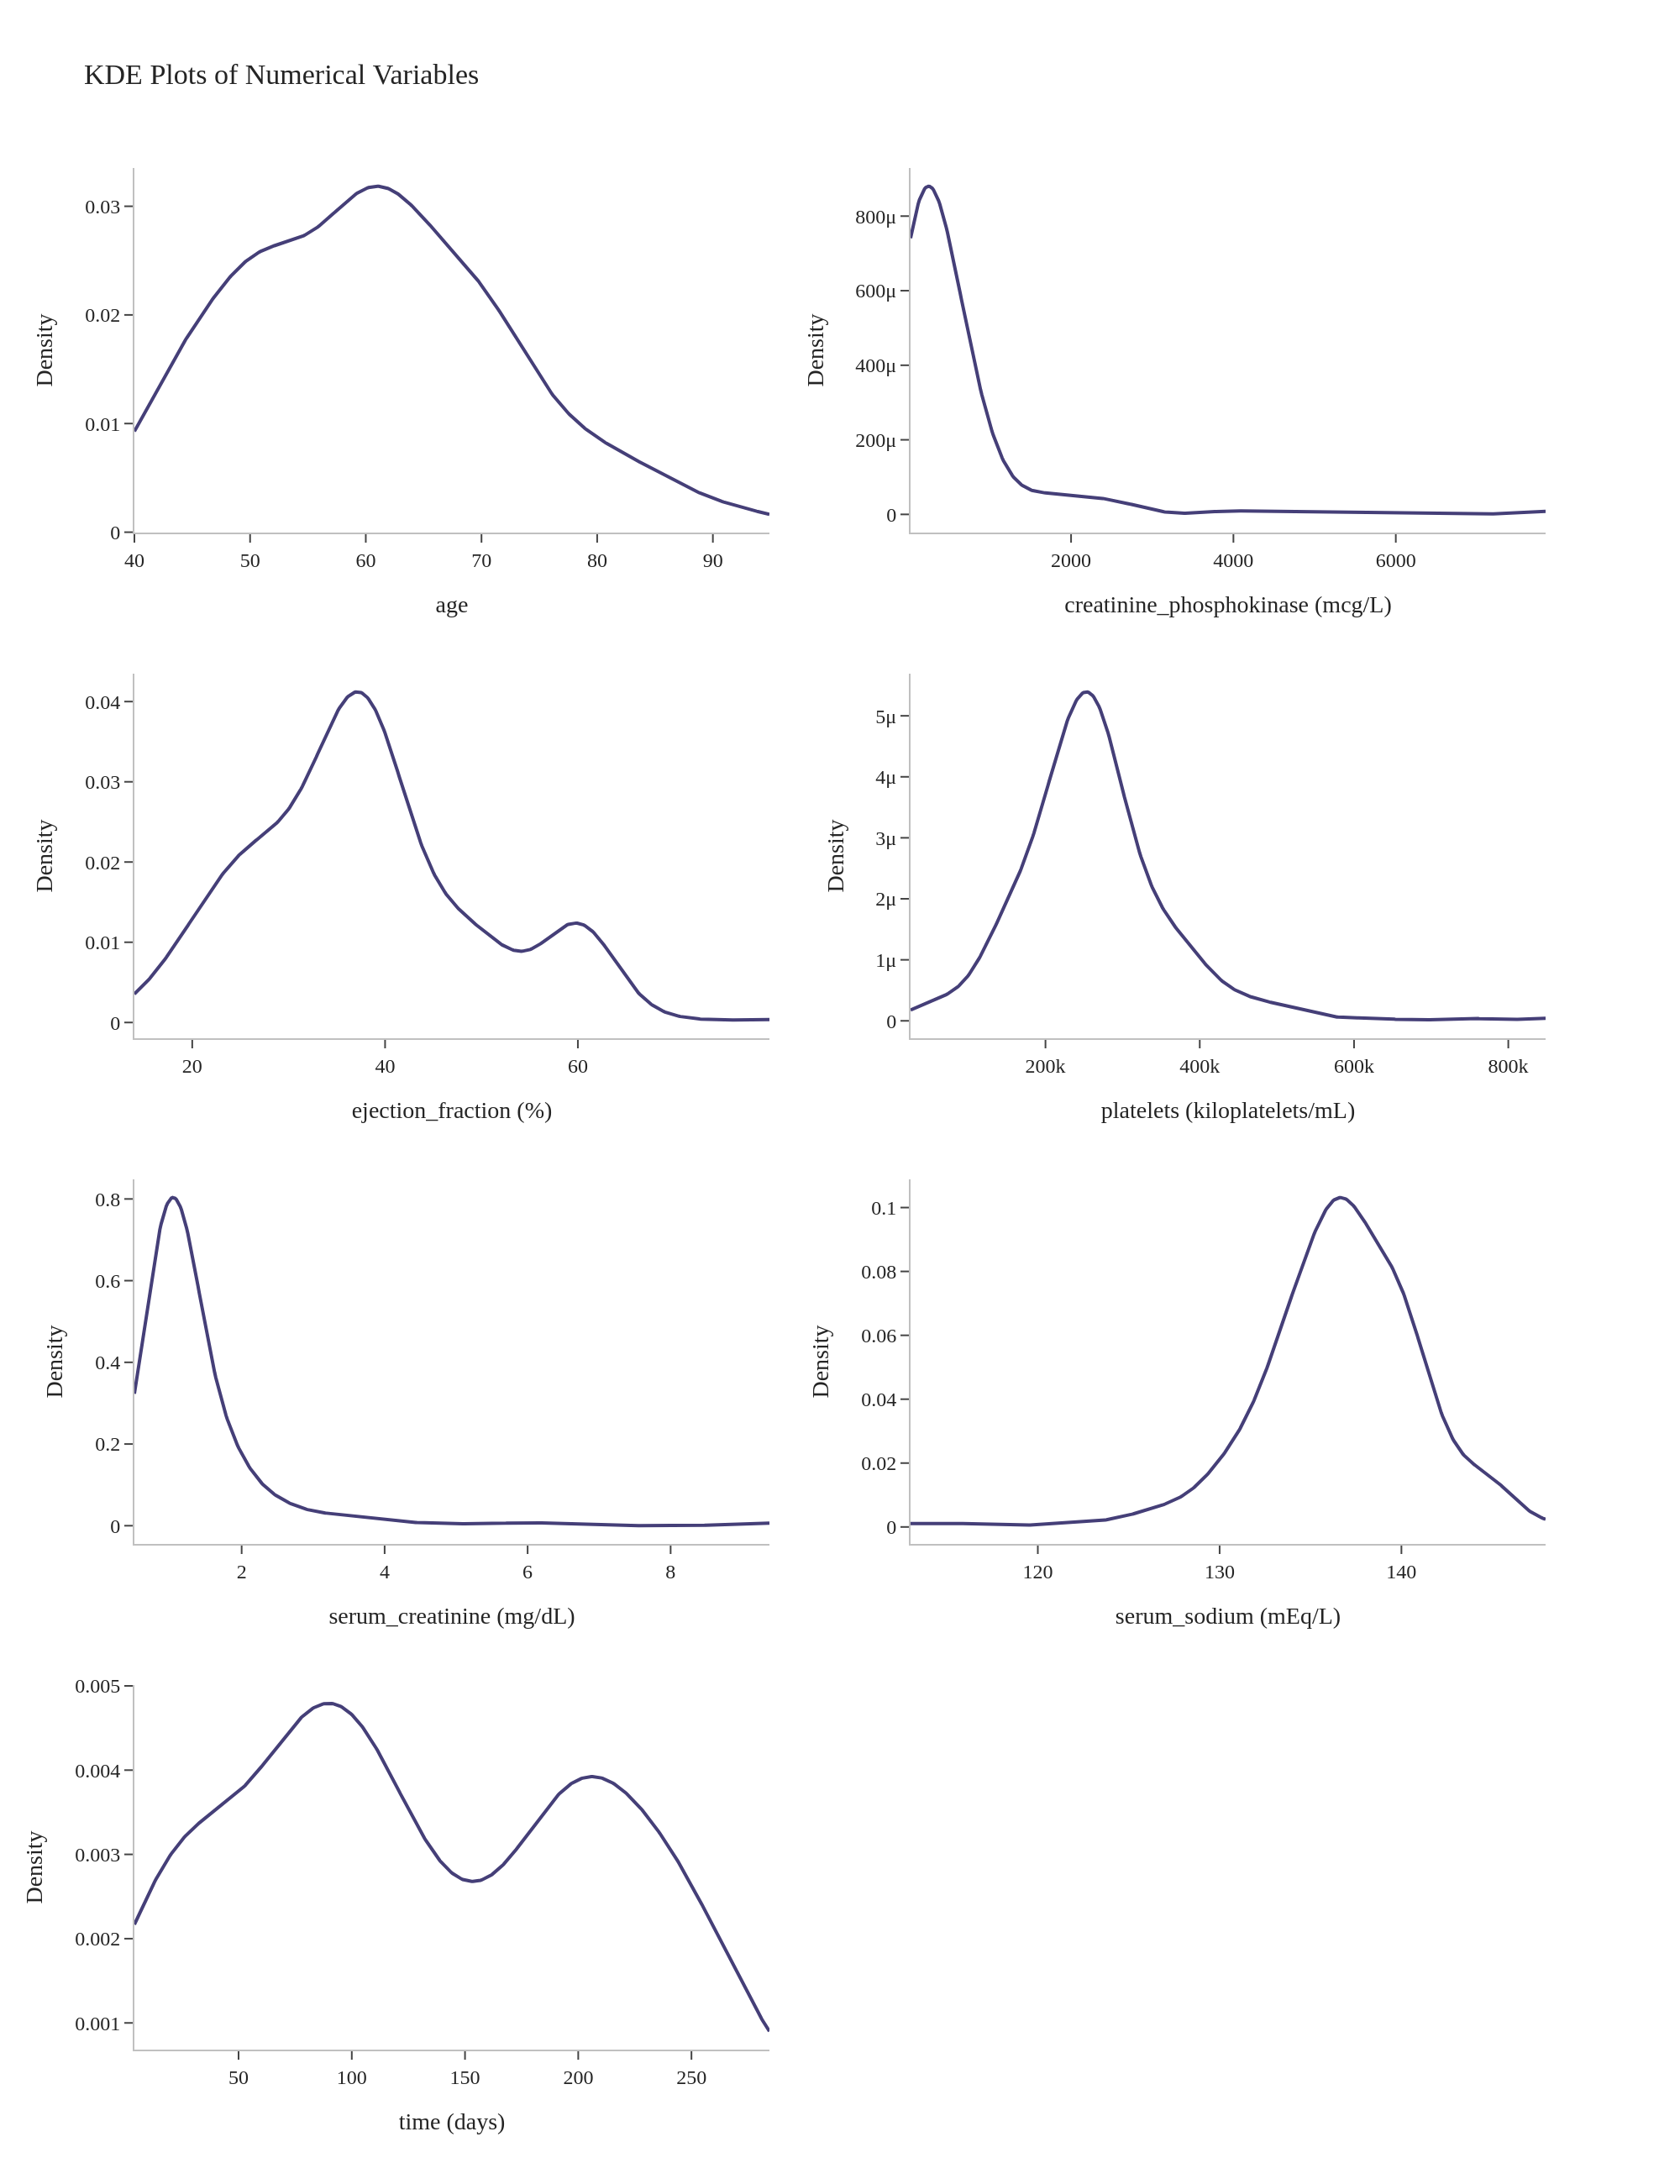

In [23]:
# ploting grafhics of distribution numerical variables
numerical_variables = df_cleaned[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']].copy()

fig  = make_subplots(rows = 4, cols=2)
rows = [1,1,2,2,3,3,4]
cols = [1,2,1,2,1,2,1]

# function create a kde plot of numerical variables
def create_trace(df: pd.DataFrame) -> list[go.Figure]:
    list_traces = list()
    for column in df.columns:
        trace = ff.create_distplot([df[column]],group_labels=[column],show_rug=False,colors=['#453F78'])
        list_traces.append(trace.data[1])
    return list_traces

traces = create_trace(numerical_variables)

fig.add_traces(traces,rows=rows,cols=cols)
fig.update_layout(showlegend=True,height=1300,title='KDE Plots of Numerical Variables',font_family='Rockwell',template='simple_white')
fig.update_yaxes(title_text='Density',linecolor='silver')
fig.update_xaxes(title_text='age',row=1,col=1,linecolor='silver')
fig.update_xaxes(title_text='creatinine_phosphokinase (mcg/L)',row=1,col=2,linecolor='silver')
fig.update_xaxes(title_text='ejection_fraction (%)',row=2,col=1,linecolor='silver')
fig.update_xaxes(title_text='platelets (kiloplatelets/mL)',row=2,col=2,linecolor='silver')
fig.update_xaxes(title_text='serum_creatinine (mg/dL)',row=3,col=1,linecolor='silver')
fig.update_xaxes(title_text='serum_sodium (mEq/L)',row=3,col=2,linecolor='silver')
fig.update_xaxes(title_text='time (days)',row=4,col=1,linecolor='silver')
fig.show('png',scale=2,width=1000)

Some observations:
- The highest concentration of age is between 50 and 70 years.
- The variable **creatinine_phosphokinase** is a distribution positive asymmetric. Because the normal values of **creatinine_phosphokinase** is 10 to 120 mcg/L, but there some people that are with the high level of **creatinine_phosphokinase**.
- The variable **serum_creatinine** also is a distribution positive asymmetric. Because the normal values of **serum_creatinine** is 0.7 to 1.3 mg/dL, but there some people that are with the high level of **serum_creatinine**.
- The variable **platelets** also is a distribution positive asymmetric a little softer. Because the normal values of **platelets** is 150 to 450 kiloplatelets/mL, but there few people that are with the high level of **platelets**.
- The variable **serum_sodium** is a distribution negative asymmetric. Because the normal values of **serum_sodium** is 135 to 145 mEq/L, but there few people that are with the low level of **serum_sodium**.

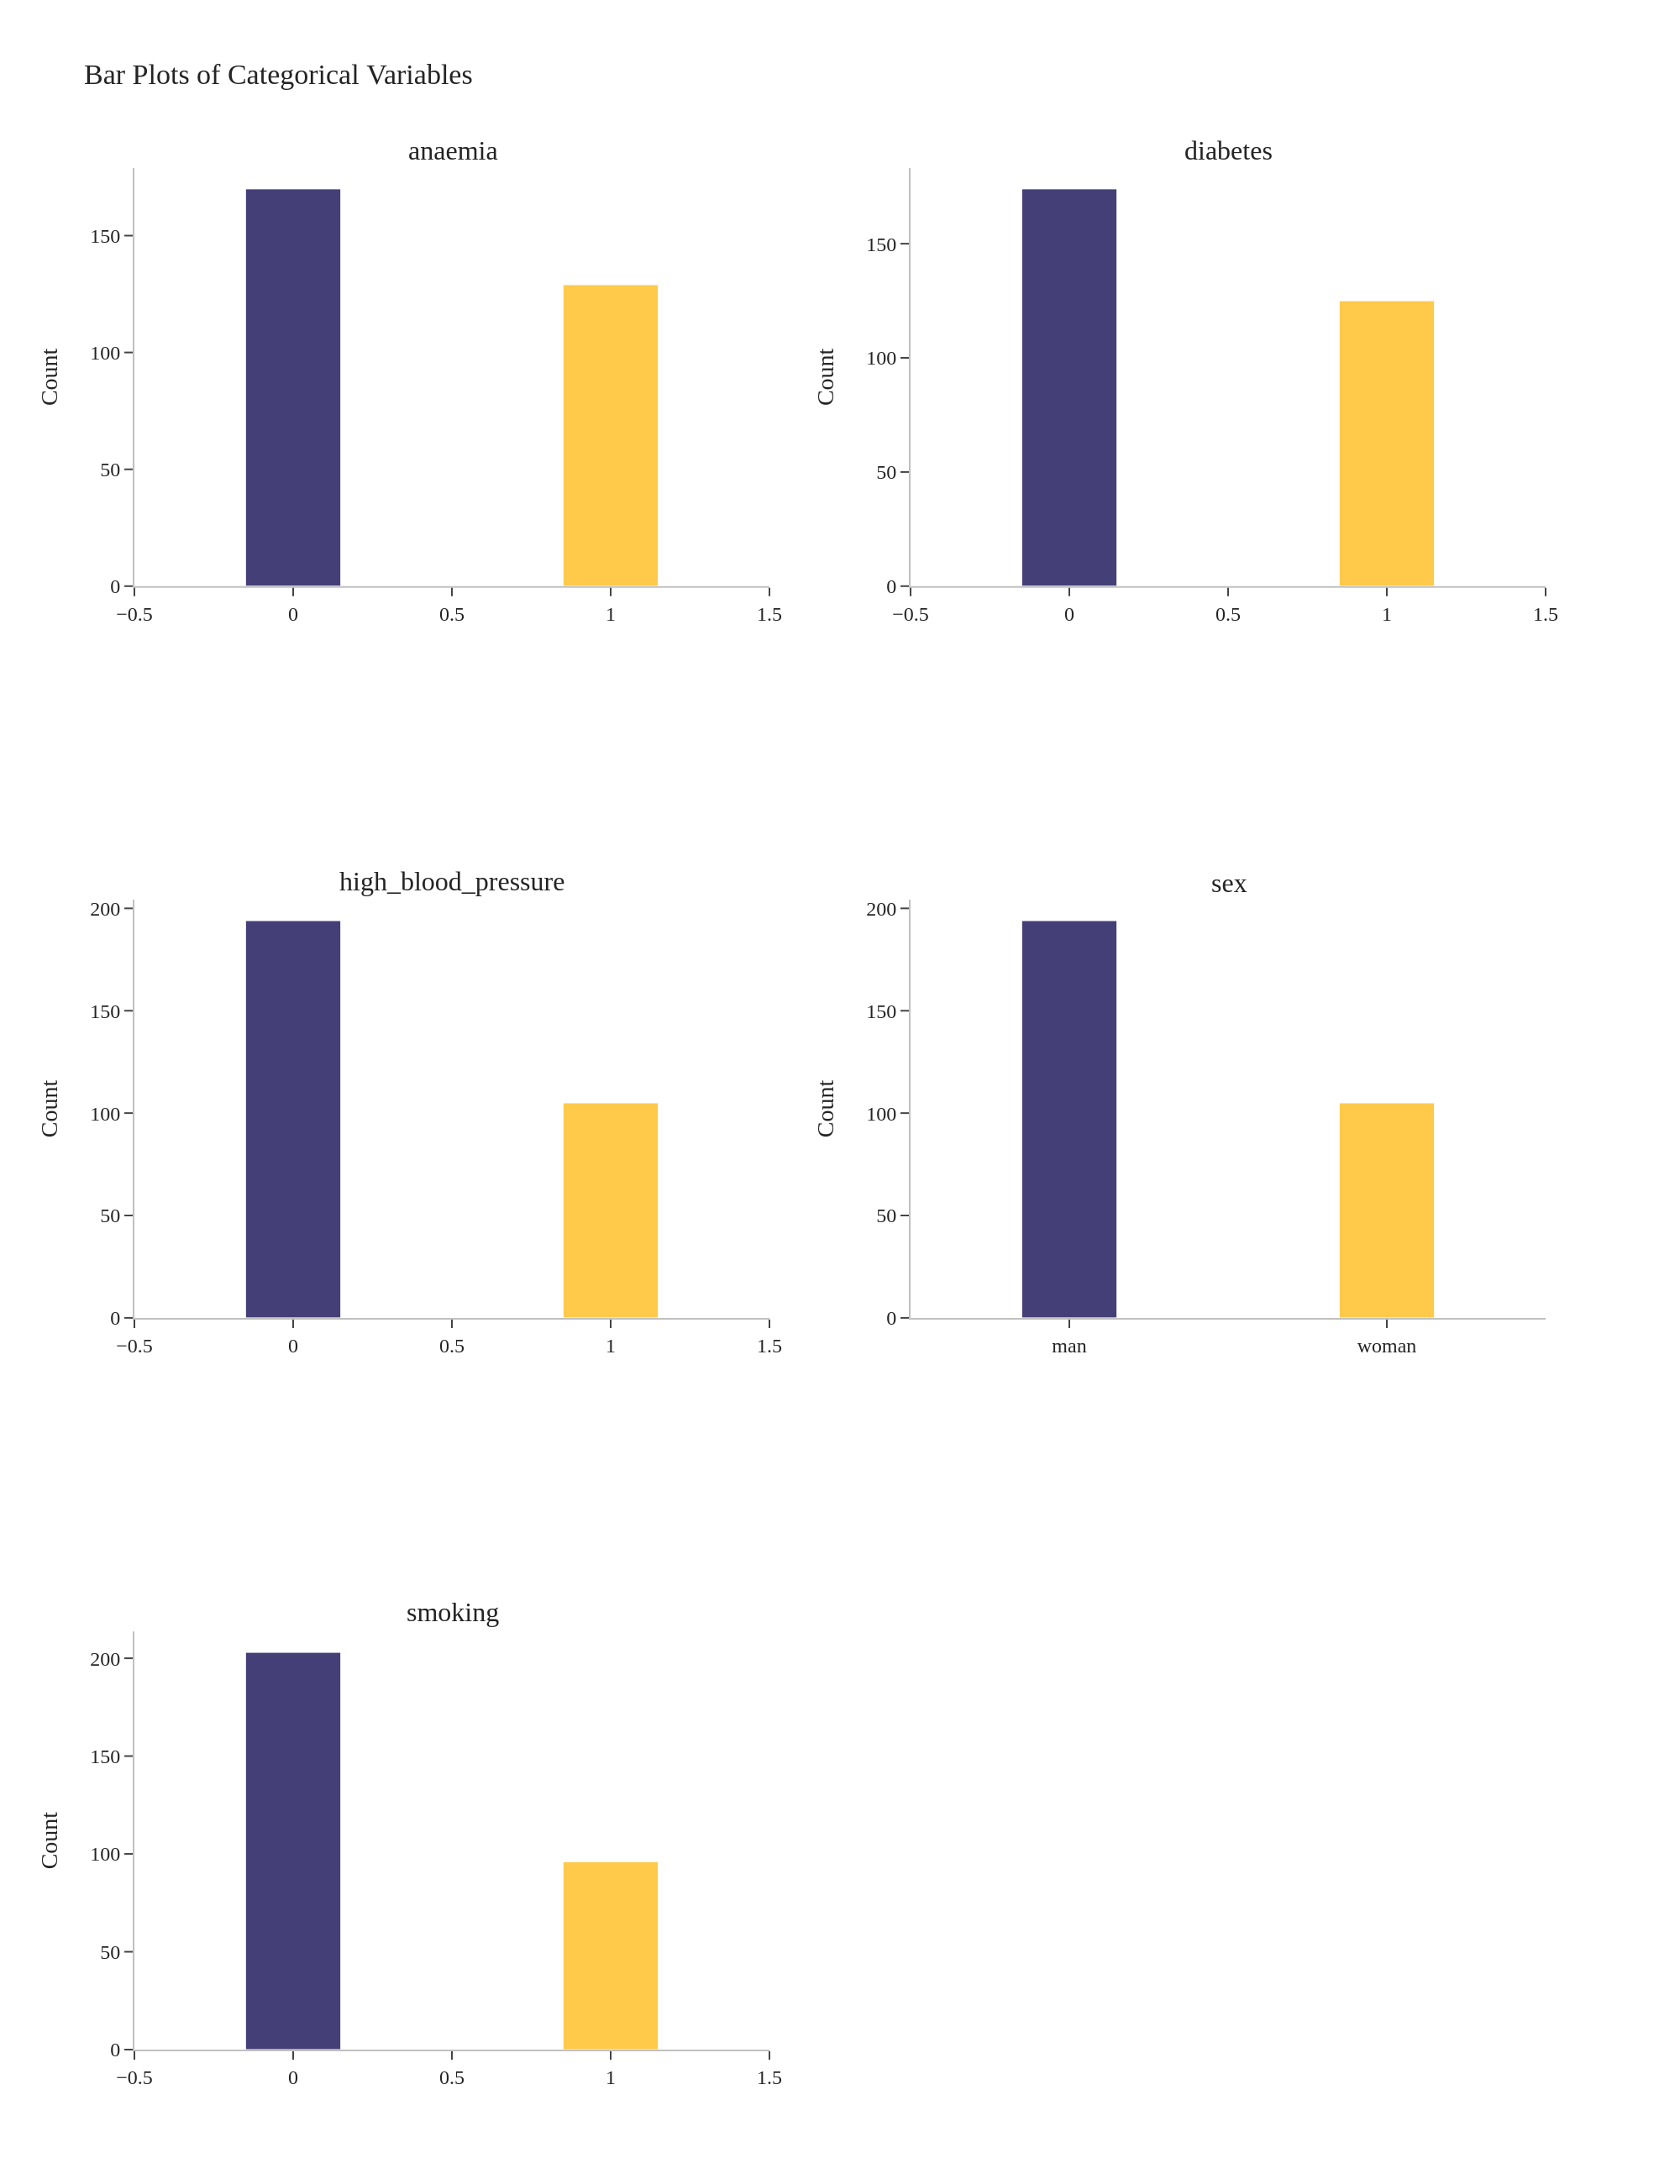

In [24]:
# ploting grafhics of distribution numerical variables
categorical_variables = df_cleaned.drop(numerical_variables.columns,axis=1).copy()
categorical_variables = categorical_variables.drop('DEATH_EVENT',axis=1).copy()

fig2  = make_subplots(rows = 3, cols=2,subplot_titles=categorical_variables.columns)
rows = [1,1,2,2,3]
cols = [1,2,1,2,1]

# function create a bar plot of categorical variables
def create_trace_bar(df: pd.DataFrame):
    list_traces = list()
    m_color = ['#453F78','#FFC94A']
    asc = False
    for column in df.columns:
        trace = go.Bar(x=df[column].unique(),y=df[column].value_counts().sort_values(ascending=asc).values,marker_color=m_color,width=0.3)
        list_traces.append(trace)
       
        if len(list_traces) == 2:
            m_color = ['#FFC94A','#453F78']
            asc=True
        else:
            m_color = ['#453F78','#FFC94A']
            asc=False
    return list_traces

traces = create_trace_bar(categorical_variables)
fig2.add_traces(traces,rows=rows,cols=cols)
fig2.update_layout(showlegend=False,height=1300,title='Bar Plots of Categorical Variables',font_family='Rockwell',template='simple_white')
fig2.update_yaxes(title= 'Count',linecolor='silver')
fig2.update_xaxes(linecolor='silver')
fig2.show('png',scale=2,width=1000)

Some observations:
- The numbers of men is almost double the number of women.
- Most of the people that had heart failure, doesn't smoking.
- Most of the people that had heart failure, doesn't had high blood pressure.

In [25]:
# proportion of response variable
df_cleaned['DEATH_EVENT'].value_counts(1)

DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64

- The response variable is unbalanced, then will have that be apply techniques to fix this, because if not the model will be biased for classify  people had heart failure and doesn't death more than people had heart failure and death.

### Multivariate Analysis

In [26]:
# correlation numerical variable
numerical_variables.corr()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


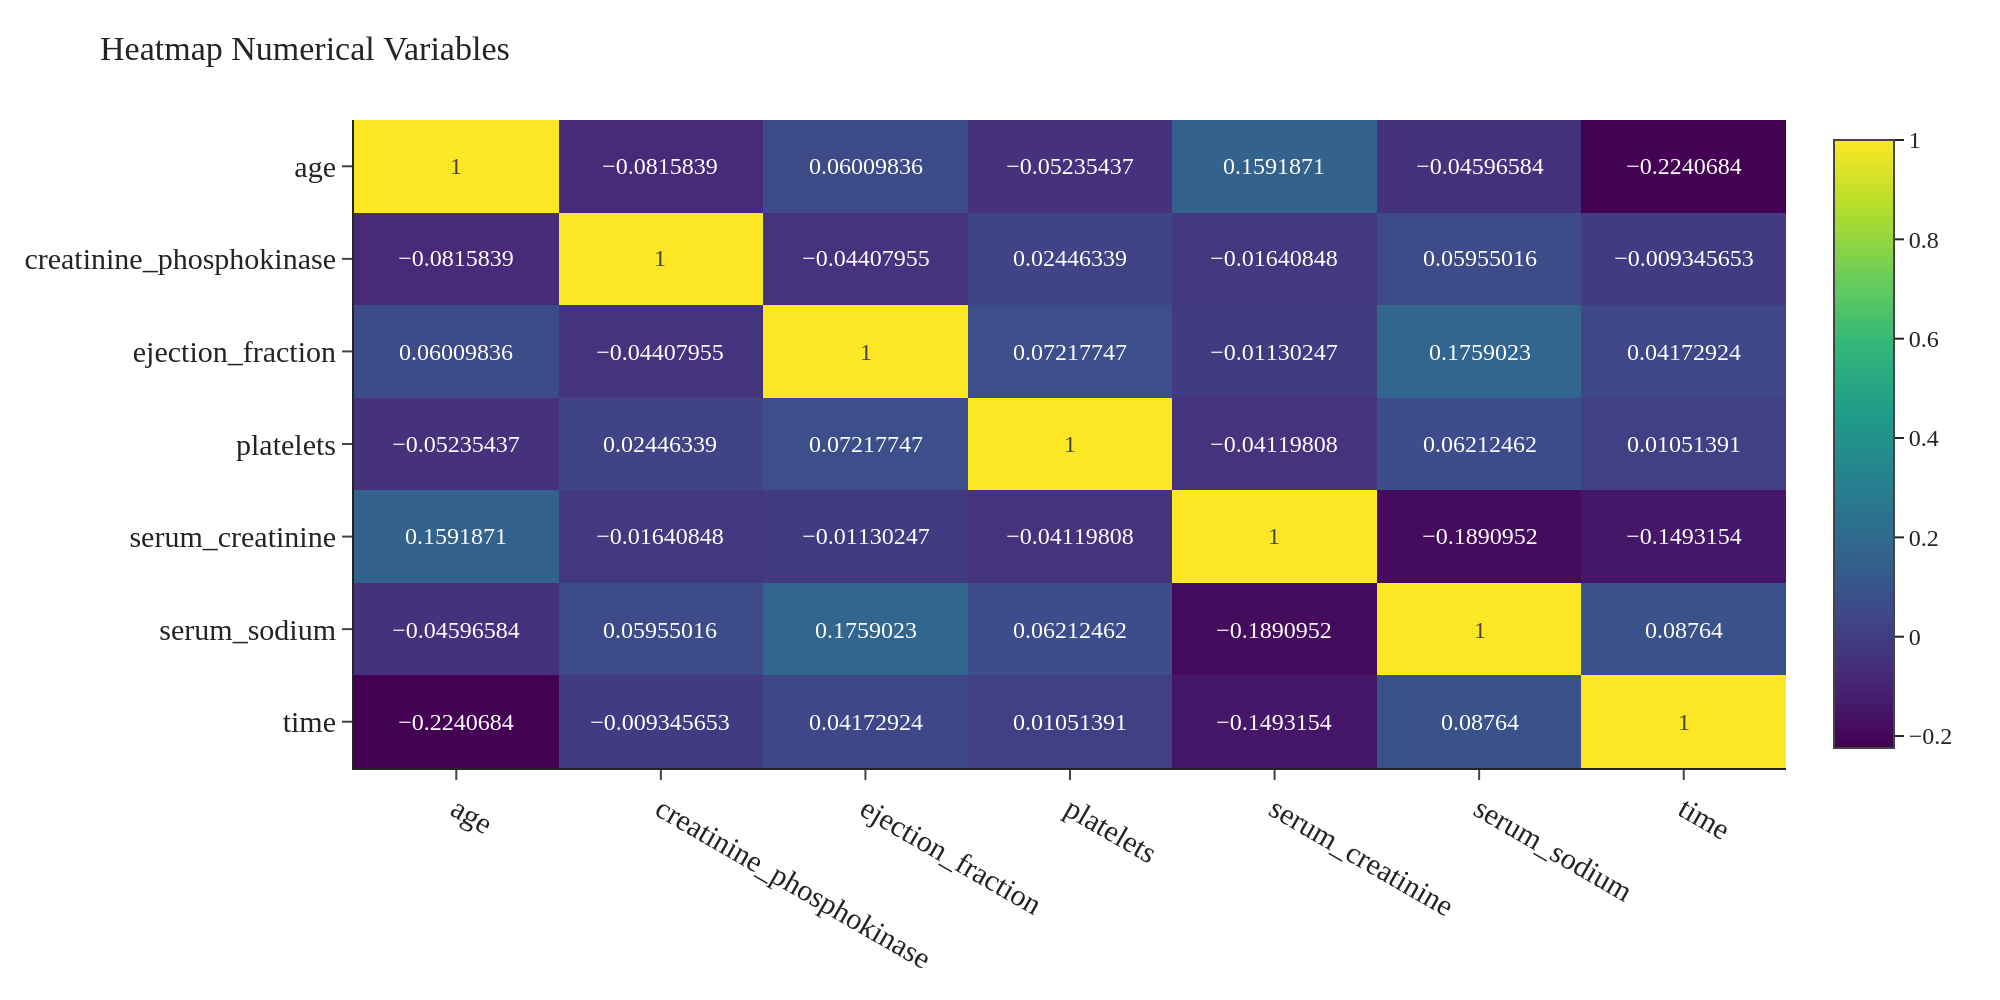

In [27]:
# ploting correlation of numerical variables
fig3 = px.imshow(numerical_variables.corr(),text_auto=True,aspect='auto',color_continuous_scale=px.colors.sequential.Viridis)
fig3.update_layout(template='simple_white',title='Heatmap Numerical Variables',font_family='Rockwell')
fig3.update_xaxes(tickfont_size=15)
fig3.update_yaxes(tickfont_size=15)
fig3.show('png',scale=2,width=1000)

- The numerical variables has much little correlation each other.

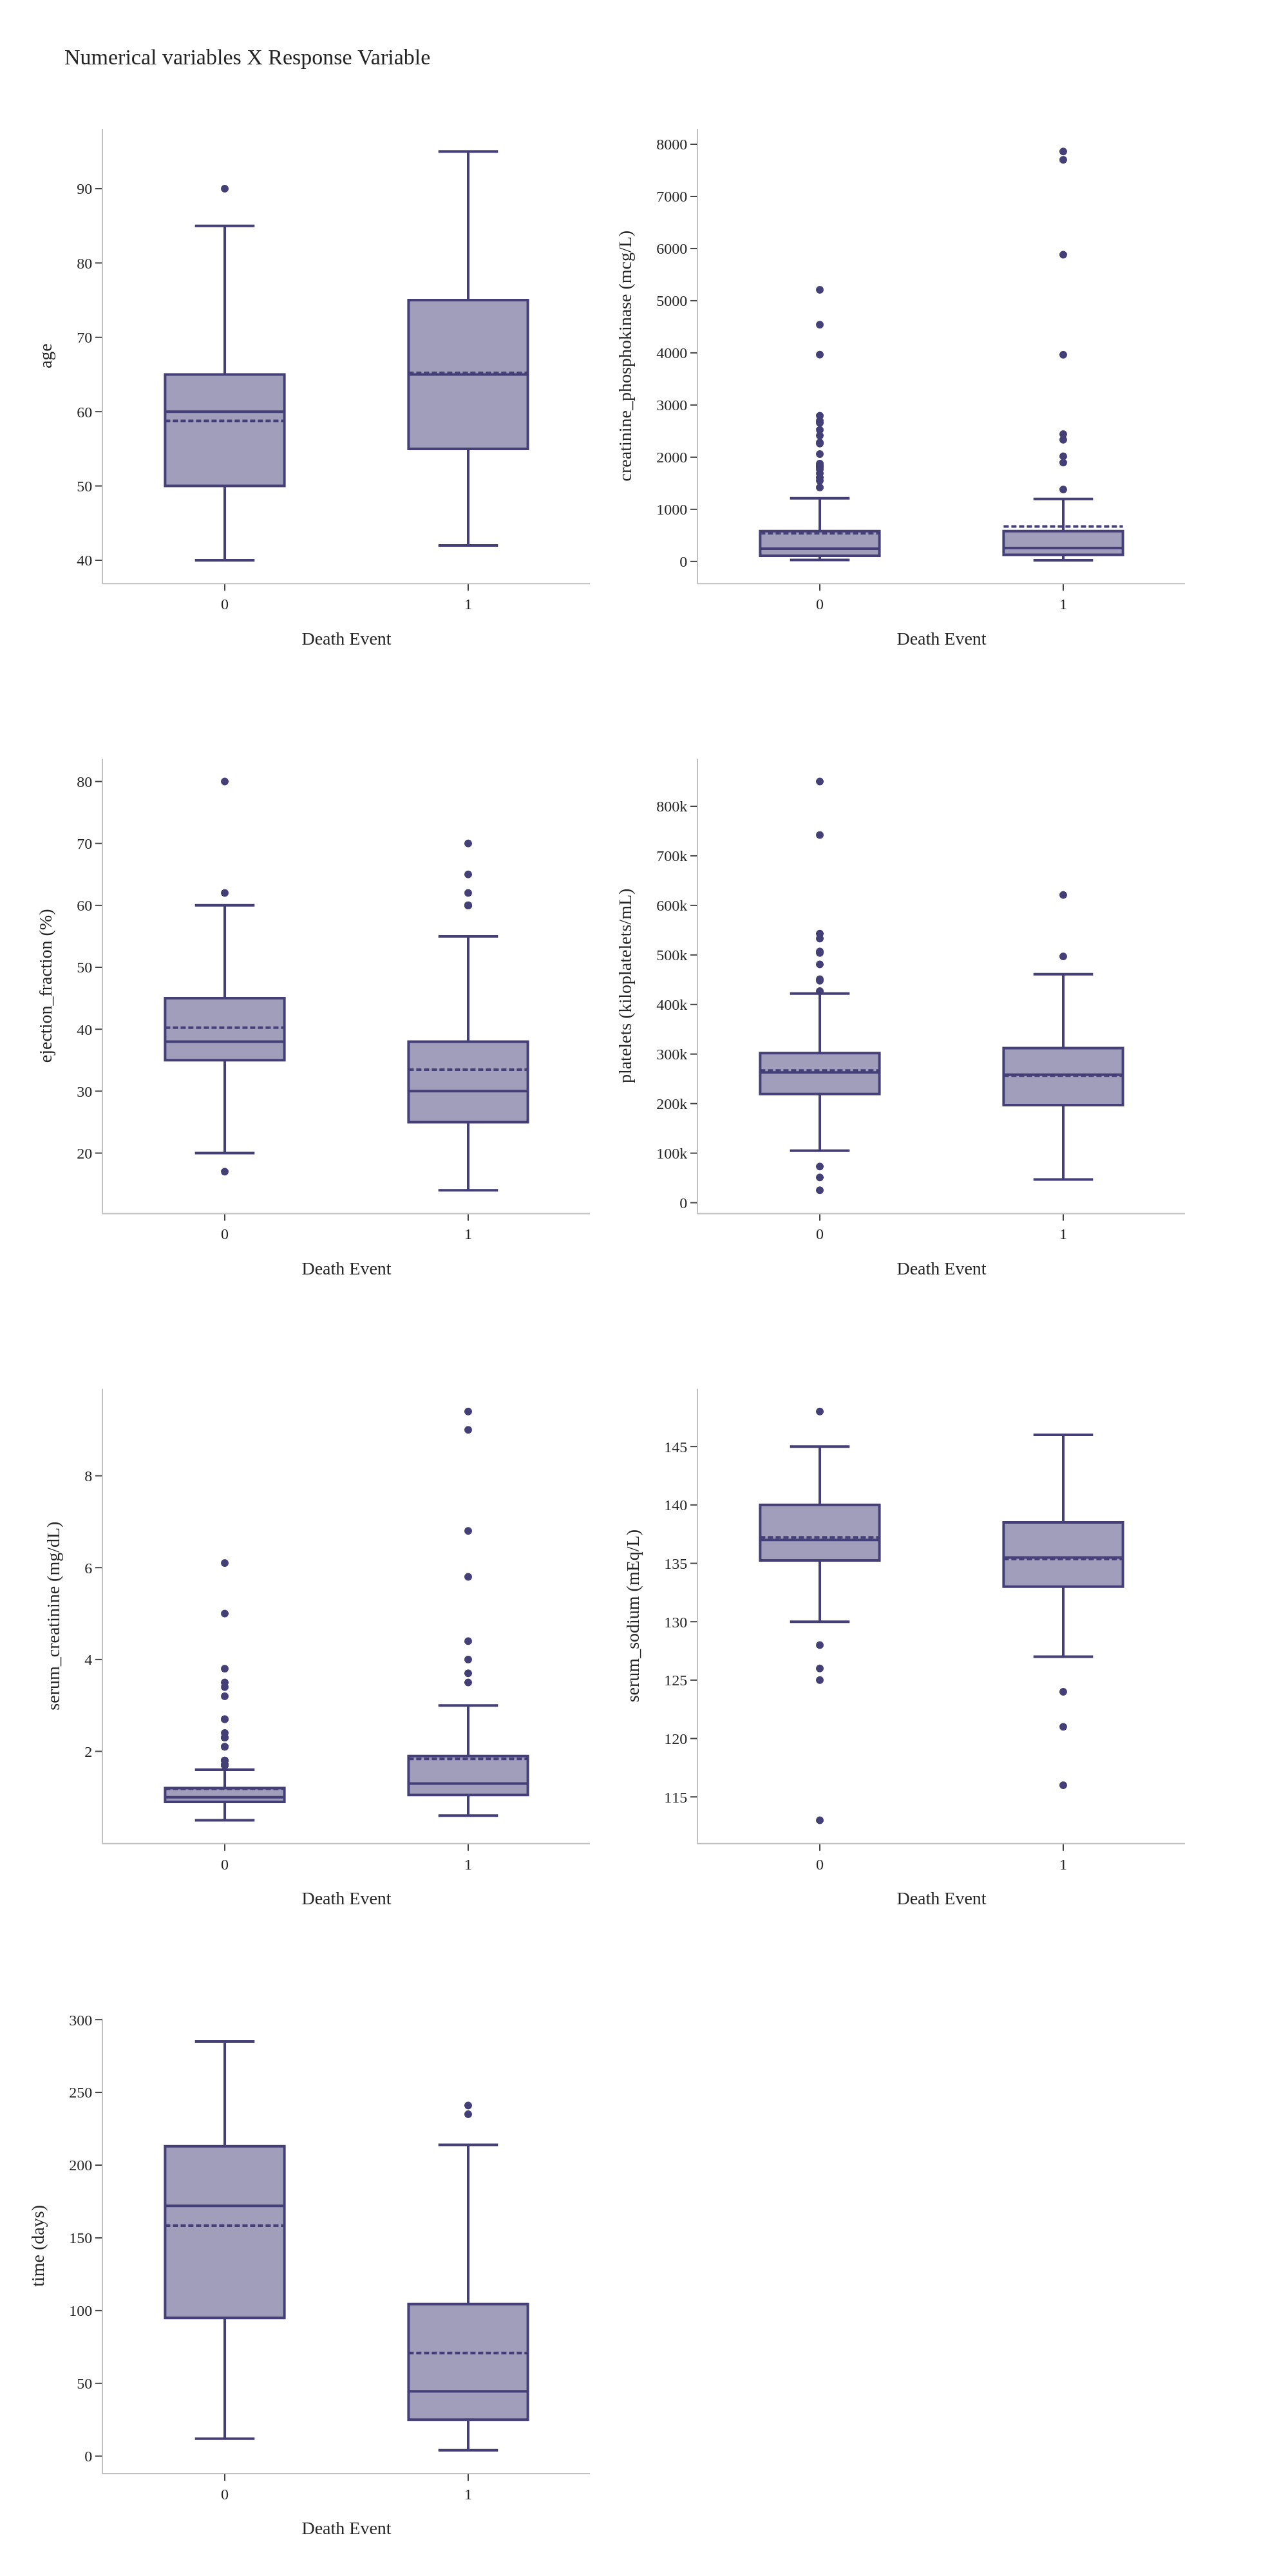

In [28]:
# ploting numerical variables x response variable
fig4  = make_subplots(rows = 4, cols=2)
rows = [1,1,2,2,3,3,4]
cols = [1,2,1,2,1,2,1]

def create_trace_box(df: pd.DataFrame, response_variable: pd.Series):
    list_traces = list()
    for column in df.columns:
        trace = go.Box(x = response_variable,y=df[column],marker_color='#453F78',boxmean=True)
        list_traces.append(trace)
    return list_traces

traces = create_trace_box(numerical_variables,df_cleaned['DEATH_EVENT'])
fig4.add_traces(traces,rows=rows,cols=cols)
fig4.update_layout(showlegend=False,height=2000,template='simple_white',font_family='Rockwell',title='Numerical variables X Response Variable')
fig4.update_xaxes(title='Death Event',linecolor='silver')
fig4.update_yaxes(title_text='age',row=1,col=1,linecolor='silver')
fig4.update_yaxes(title_text='creatinine_phosphokinase (mcg/L)',row=1,col=2,linecolor='silver')
fig4.update_yaxes(title_text='ejection_fraction (%)',row=2,col=1,linecolor='silver')
fig4.update_yaxes(title_text='platelets (kiloplatelets/mL)',row=2,col=2,linecolor='silver')
fig4.update_yaxes(title_text='serum_creatinine (mg/dL)',row=3,col=1,linecolor='silver')
fig4.update_yaxes(title_text='serum_sodium (mEq/L)',row=3,col=2,linecolor='silver')
fig4.update_yaxes(title_text='time (days)',row=4,col=1,linecolor='silver')
fig4.show('png',scale=2,width=1000)

Some observations:
- The mean of people that had heart failure and dead is 65 years, that show how older the person more chance of died . And also can be observed that only one person that had 90 years doesn't died.
- There a high level of creatinine_phosphokinase doesn't indicate that the person that had heart failure will have more chance death. This also occur with serum_creatinine.
- If the person had one mean of 160 days of follow-up or more, your survival chance is biggest.

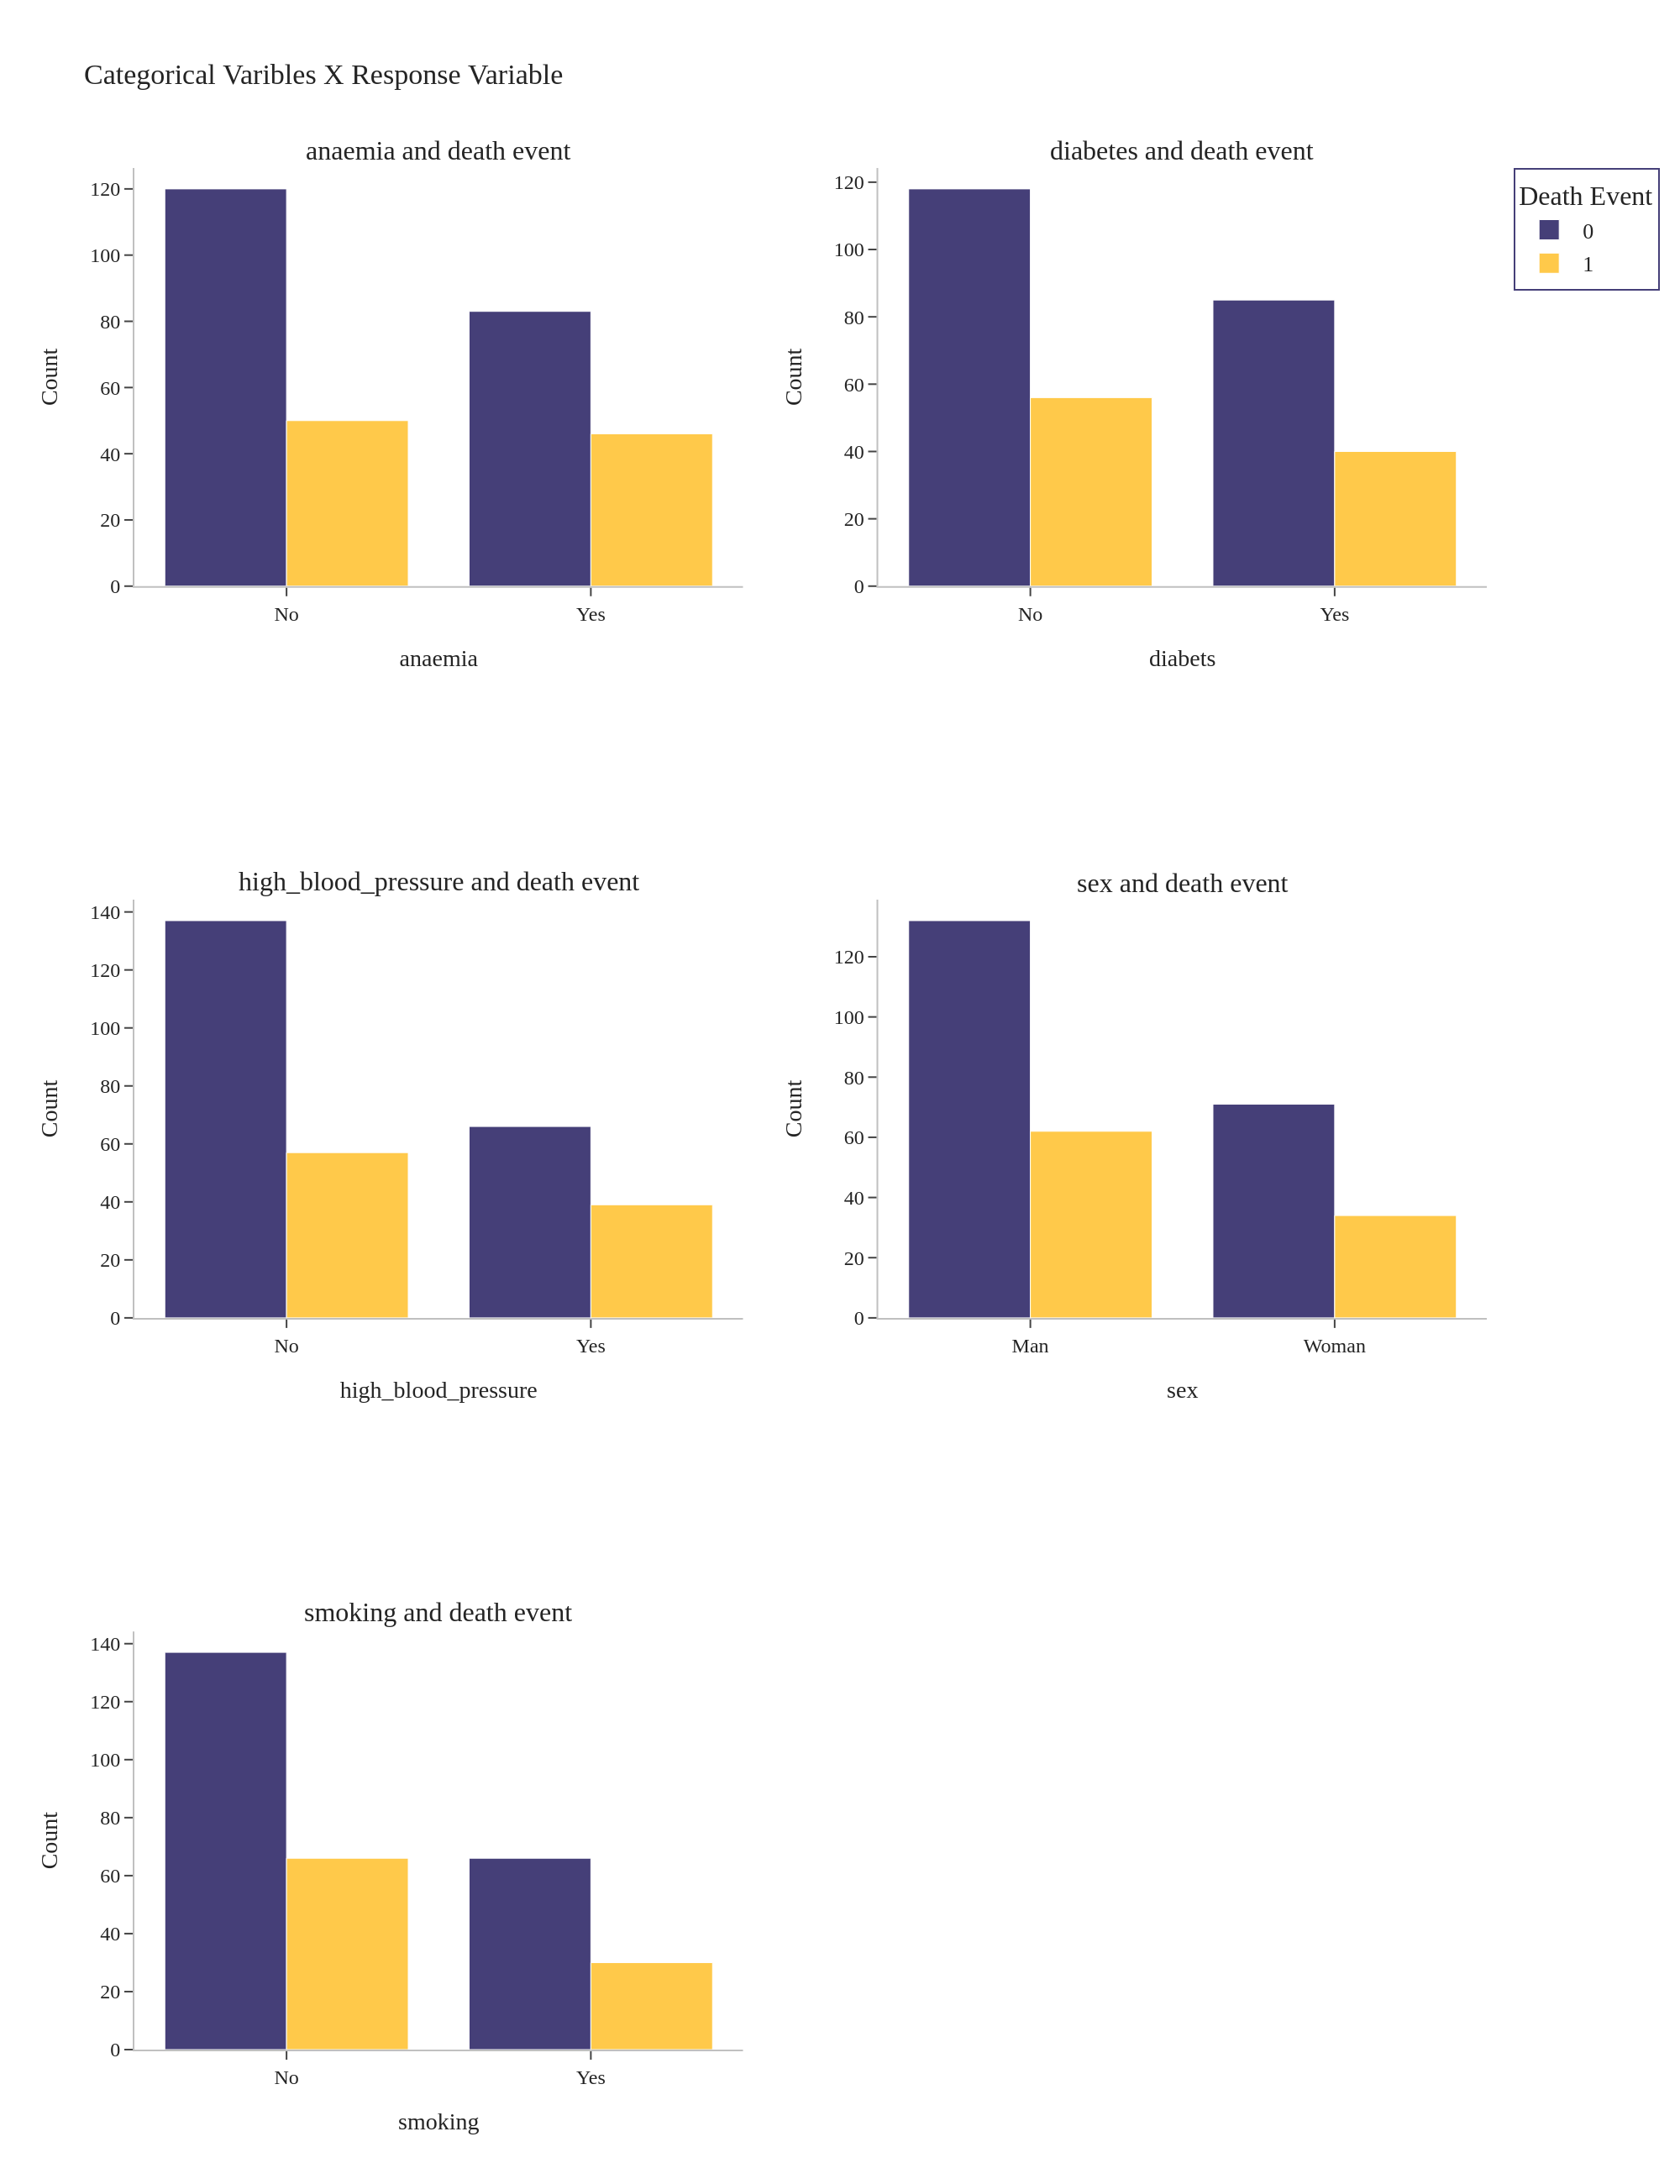

In [29]:
#categorical variables X response variable
# ploting numerical variables x response variable
fig5  = make_subplots(rows = 3, cols=2,subplot_titles=categorical_variables.columns+' and death event')
rows = [1,1,2,2,3]
cols = [1,2,1,2,1]

def create_trace_bar(df: pd.DataFrame, response_variable: pd.Series):
    list_traces = list()
    list_traces2 = list()
    legend=True
    count = 0
    for column in df.columns:
        if column == 'sex':
            x=['Man','Woman']
            trace = go.Bar(x = x,y=df.groupby(response_variable)[column].value_counts()[0].values,
                        marker_color='#453F78',name='0',
                        showlegend=legend)
            trace2 = go.Bar(x = x,y=df.groupby(response_variable)[column].value_counts()[1].values,
                            marker_color='#FFC94A',name='1',
                            showlegend=legend)
        else:
            x = ['No','Yes']
            trace = go.Bar(x = x,y=df.groupby(response_variable)[column].value_counts()[0].values,
                        marker_color='#453F78',name='0',
                        showlegend=legend)
            trace2 = go.Bar(x = x,y=df.groupby(response_variable)[column].value_counts()[1].values,
                            marker_color='#FFC94A',name='1',
                            showlegend=legend)
        count+=1
        if count >= 1:
            legend=False
        list_traces.append(trace)
        list_traces2.append(trace2)
    return list_traces,list_traces2
traces,traces2 = create_trace_bar(categorical_variables,df_cleaned['DEATH_EVENT'])
fig5.add_traces(traces,rows=rows,cols=cols)
fig5.add_traces(traces2,rows=rows,cols=cols)
fig5.update_layout(showlegend=True,height=1300,title='Categorical Varibles X Response Variable',font_family='Rockwell',
                   template='simple_white',legend=dict(orientation='v',bordercolor='#453F78',borderwidth=1,font_size=13,title='Death Event'))
fig5.update_yaxes(title='Count',linecolor='silver')
fig5.update_xaxes(title_text='anaemia',row=1,col=1,linecolor='silver')
fig5.update_xaxes(title_text='diabets',row=1,col=2,linecolor='silver')
fig5.update_xaxes(title_text='high_blood_pressure',row=2,col=1,linecolor='silver')
fig5.update_xaxes(title_text='sex',row=2,col=2,linecolor='silver')
fig5.update_xaxes(title_text='smoking',row=3,col=1,linecolor='silver')
fig5.show('png',scale=2,width=1000)

Some observations:
- There high blood pressure didn't important fact for the person death that had heart failure, like also smoking, anaemia and diabets.
- Of 194 men that had heart failure 68,04% suirvived and of 105 women that had heart failure 67,62% also survived. And this show that the sex of person didn't important fact for the person death. 

In [30]:
# save df_cleaned
df_cleaned.to_csv('../data/df_cleaned.csv',index=False)